# Importing libraries

In [1]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.utils import shuffle
try:
    import xgboost
except ImportError:
    !pip install xgboost
import os
os.environ['TF_DETERMINISTIC_OPS'] = '1'

In [2]:
dataset = pd.read_csv('data.csv')

In [3]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# drop id and empty column
dataset.drop(['Unnamed: 32', "id"], axis=1, inplace=True)

In [6]:
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
dataset.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
# check presence of missing values in data
dataset.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<AxesSubplot:>

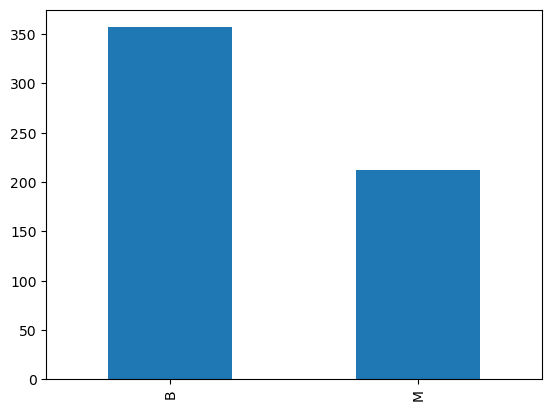

In [9]:
dataset["diagnosis"].value_counts().plot(kind = "bar")

In [10]:
# turn target variable into 1s and 0s
dataset.diagnosis =[1 if value == "M" else 0 for value in dataset.diagnosis]

In [11]:
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
# Store the 'diagnosis' column separately
diagnosis_column = dataset['diagnosis']

# Drop the 'diagnosis' column from the DataFrame
dataset = dataset.drop(columns=['diagnosis'])

# Append the 'diagnosis' column to the DataFrame as the last column
dataset['diagnosis'] = diagnosis_column

In [13]:
dataset.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


# Get the shape of the dataframe

In [14]:
dataset.shape

(569, 31)

In [15]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Splitting the dataset into the Training set and Test Set

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [17]:
# Shuffle data while keeping the correspondence between features and labels
X_train, y_train = shuffle(X_train, y_train, random_state=0)
X_test, y_test = shuffle(X_test, y_test, random_state=0)

# Feature Scaling

In [18]:
# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Testing with GridSearchCV to identify potential hyperparameters

In [19]:
# classifier = XGBClassifier(random_state=0)#
# Define parameter grid
# param_grid = {
#     'learning_rate': [0.1, 0.01, 0.001],
#     'max_depth': [3, 4, 5],
#     'n_estimators': [100, 200, 300]
# }

# # Create GridSearchCV object
# grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=3, n_jobs=-1)

# # Fit GridSearchCV to training data
# grid_search.fit(X_train, y_train)

# # Get the best parameters
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

In [20]:
# initite XGBoost classifier
classifier = XGBClassifier(random_state=0)
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [21]:
y_pred = classifier.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100
print("Accuracy: {:.2f}%".format(accuracy))
print("Precision: {:.2f}%".format(precision))
print("Recall: {:.2f}%".format(recall))
print("F1 Score: {:.2f}%".format(f1))

Accuracy: 95.61%
Precision: 93.75%
Recall: 95.74%
F1 Score: 94.74%


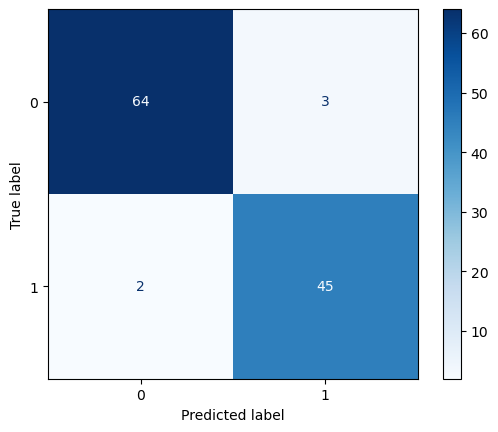

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Confusion Matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.Blues)

In [24]:
# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        67
           1       0.94      0.96      0.95        47

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



# ii) Support Vector Classification

In [25]:
from sklearn.svm import SVC
#Training  the Support Vector Classifier and evaluating it 

# Create a classifier and train it
svc = SVC(kernel='rbf', C=10, gamma=0.01, random_state=0)
svc.fit(X_train, y_train)

SVC(C=10, gamma=0.01, random_state=0)

In [26]:
# Predict the test set results
svc_y_pred = svc.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, svc_y_pred)}")
print(classification_report(y_test, svc_y_pred))

Accuracy: 0.9824561403508771
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        67
           1       0.98      0.98      0.98        47

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



# iii) Random Forest Classification

In [27]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier

# Instantiate Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=0)
rf_classifier.fit(X_train, y_train)

# Cross-validation for Random Forest Classifier
rf_accuracy_scores = cross_val_score(estimator=rf_classifier, X=X_train, y=y_train, cv=10)
rf_precision_scores = cross_val_score(estimator=rf_classifier, X=X_train, y=y_train, cv=10, scoring='precision')
rf_recall_scores = cross_val_score(estimator=rf_classifier, X=X_train, y=y_train, cv=10, scoring='recall')
rf_f1_scores = cross_val_score(estimator=rf_classifier, X=X_train, y=y_train, cv=10, scoring='f1')

# Print the results
print("Random Forest Classifier - Cross Validation Results:")
print("Accuracy: {:.2f} %".format(rf_accuracy_scores.mean() * 100))
print("Precision: {:.2f} %".format(rf_precision_scores.mean() * 100))
print("Recall: {:.2f} %".format(rf_recall_scores.mean() * 100))
print("F1 Score: {:.2f} %".format(rf_f1_scores.mean() * 100))

Random Forest Classifier - Cross Validation Results:
Accuracy: 94.95 %
Precision: 95.42 %
Recall: 90.88 %
F1 Score: 92.81 %


In [28]:
# Predictions and evaluation
rf_y_pred = rf_classifier.predict(X_test)

In [29]:
# Confusion Matrix
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)
print("\nConfusion Matrix:")
print(rf_conf_matrix)


Confusion Matrix:
[[64  3]
 [ 1 46]]


In [30]:
# Classification Report
rf_class_report = classification_report(y_test, rf_y_pred)
print("\nClassification Report:")
print(rf_class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        67
           1       0.94      0.98      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



# iv) Neural Network Classification

In [31]:
# from sklearn.neural_network import MLPClassifier
# # Define parameter grid
# param_grid = {
#     'hidden_layer_sizes': [(128, 64), (64, 32)],
#     'activation': ['relu', 'tanh'],
#     'solver': ['adam', 'sgd'],
#     'max_iter': [1000, 2000]
# }

# # Create MLPClassifier
# ann_classifier = MLPClassifier(random_state=0)

# # Create GridSearchCV object
# grid_search = GridSearchCV(estimator=ann_classifier, param_grid=param_grid, cv=3, n_jobs=-1)
# # Fit GridSearchCV to training data
# grid_search.fit(X_train, y_train)
# # Get the best parameters
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        67
           1       0.94      1.00      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114



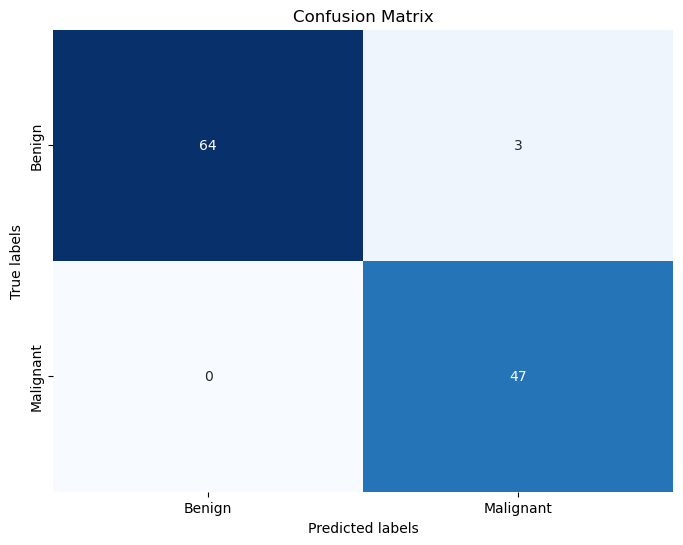

In [32]:
from sklearn.neural_network import MLPClassifier
import seaborn as sns

# Use the best parameters to create the final model
ann_classifier = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', random_state=1, max_iter=1000)
ann_classifier.fit(X_train, y_train)

# Predictions
ann_y_pred = ann_classifier.predict(X_test)

# Print classification report
print(classification_report(y_test, ann_y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, ann_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# v) Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
# Instantiating Logistic Regression model
log_reg = LogisticRegression(random_state=0)

# Training Logistic Regression model using the fit method 
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [34]:
# Predict using Logistic Regression
y_pred_log_reg = log_reg.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score y_test is a actual value,y_pred_log_reg ispredicted value
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg) * 100
precision_log_reg = precision_score(y_test, y_pred_log_reg) * 100
recall_log_reg = recall_score(y_test, y_pred_log_reg) * 100
f1_log_reg = f1_score(y_test, y_pred_log_reg) * 100

print("Logistic Regression Metrics:")#all printed at 2dps
print("Accuracy: {:.2f}%".format(accuracy_log_reg))
print("Precision: {:.2f}%".format(precision_log_reg))
print("Recall: {:.2f}%".format(recall_log_reg))
print("F1 Score: {:.2f}%".format(f1_log_reg))

# Confusion Matrix for Logistic Regression
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print("Confusion Matrix for Logistic Regression:")
print(conf_matrix_log_reg)


Logistic Regression Metrics:
Accuracy: 96.49%
Precision: 95.74%
Recall: 95.74%
F1 Score: 95.74%
Confusion Matrix for Logistic Regression:
[[65  2]
 [ 2 45]]


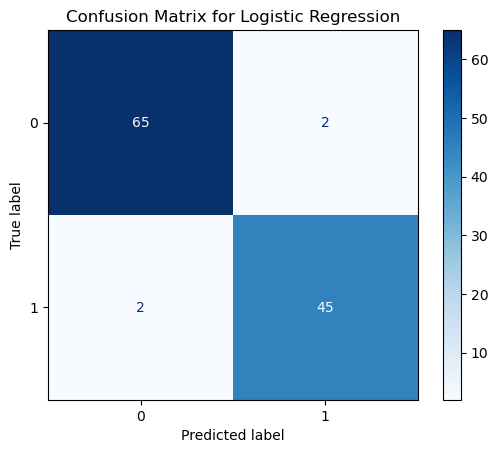

In [35]:
# Confusion Matrix Plot for Logistic Regression
disp_log_reg = ConfusionMatrixDisplay(conf_matrix_log_reg, display_labels=log_reg.classes_)
disp_log_reg.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [36]:
# Classification Report
log_reg_class_report = classification_report(y_test, y_pred_log_reg)
print("\nClassification Report:")
print(rf_class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        67
           1       0.94      0.98      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



# VI) Convolutional Neural Network

In [37]:
# Set random seeds for reproducibility
np.random.seed(0)
tf.random.set_seed(0)

# Define the CNN model 
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model 
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), shuffle=False)

Epoch 1/30
15/15 [==============================] - 2s 34ms/step - loss: 0.4434 - accuracy: 0.9121 - val_loss: 0.2357 - val_accuracy: 0.9298
Epoch 2/30
15/15 [==============================] - 0s 8ms/step - loss: 0.1611 - accuracy: 0.9407 - val_loss: 0.1587 - val_accuracy: 0.9298
Epoch 3/30
15/15 [==============================] - 0s 10ms/step - loss: 0.1131 - accuracy: 0.9495 - val_loss: 0.1418 - val_accuracy: 0.9298
Epoch 4/30
15/15 [==============================] - 0s 8ms/step - loss: 0.0983 - accuracy: 0.9626 - val_loss: 0.1222 - val_accuracy: 0.9298
Epoch 5/30
15/15 [==============================] - 0s 9ms/step - loss: 0.0823 - accuracy: 0.9670 - val_loss: 0.1108 - val_accuracy: 0.9298
Epoch 6/30
15/15 [==============================] - 0s 10ms/step - loss: 0.0717 - accuracy: 0.9736 - val_loss: 0.1044 - val_accuracy: 0.9474
Epoch 7/30
15/15 [==============================] - 0s 9ms/step - loss: 0.0659 - accuracy: 0.9802 - val_loss: 0.0990 - val_accuracy: 0.9561
Epoch 8/30
15/15 

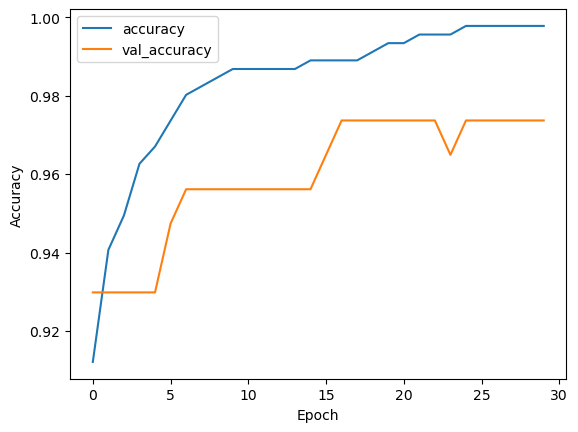

4/4 [==============================] - 0s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98        67
           1       0.96      0.98      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
[[65  2]
 [ 1 46]]


In [38]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)

# Predictions
y_pred_prob = model.predict(X_test)
cnn_y_pred = (y_pred_prob > 0.5).astype(int)

# Classification report
print("Classification Report:")
print(classification_report(y_test, cnn_y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, cnn_y_pred))

# Visualizing the Precision-Recall Curve

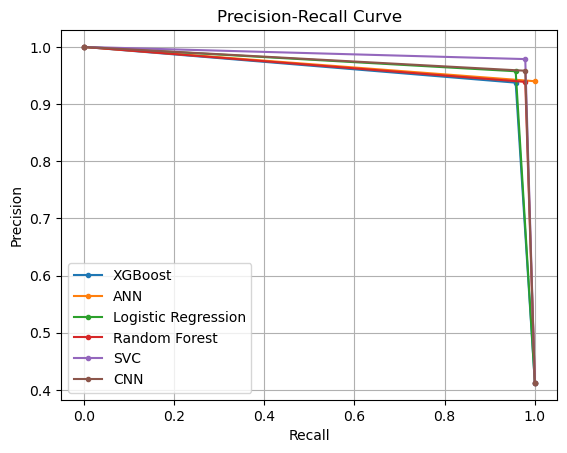

In [39]:
# Precision-Recall Curve for XGBoost Classifier
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, marker='.', label='XGBoost')
         
# Precision-Recall Curve for ANN Classifier
ann_precision, ann_recall, _ = precision_recall_curve(y_test, ann_y_pred)
plt.plot(ann_recall, ann_precision, marker='.', label='ANN')

# Precision-Recall Curve for Logistic Regression
precision_log_reg, recall_log_reg, _ = precision_recall_curve(y_test, y_pred_log_reg)
plt.plot(recall_log_reg, precision_log_reg, marker='.', label='Logistic Regression')

# Precision-Recall Curve for Random Forest
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_y_pred)
plt.plot(rf_recall, rf_precision, marker='.', label='Random Forest')

# Precision-Recall Curve for SVC
sv_precision, sv_recall, _ = precision_recall_curve(y_test, svc_y_pred)
plt.plot(sv_recall, sv_precision, marker='.', label='SVC')

# Precision-Recall Curve for SVC
cnn_precision, cnn_recall, _ = precision_recall_curve(y_test, cnn_y_pred)
plt.plot(cnn_recall, cnn_precision, marker='.', label='CNN')

# Axis labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()

# Visualizing the ROC curve

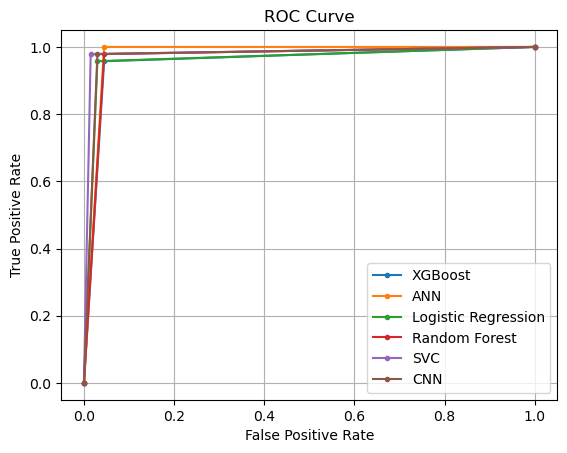

In [40]:
# ROC Curve for XGBoost Classifier
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, marker='.', label='XGBoost')
         
# ROC Curve for ANN Classifier
fpr_ann, tpr_ann, _ = roc_curve(y_test, ann_y_pred)
plt.plot(fpr_ann, tpr_ann, marker='.', label='ANN')

# ROC Curve for Logistic Regression
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_pred_log_reg)
plt.plot(fpr_log_reg, tpr_log_reg, marker='.', label='Logistic Regression')

# ROC Curve for Logistic Regression
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_y_pred)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')

# ROC Curve for SVC
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_y_pred)
plt.plot(svc_fpr, svc_tpr, marker='.', label='SVC')

# ROC Curve for SVC
cnn_fpr, cnn_tpr, _ = roc_curve(y_test, cnn_y_pred)
plt.plot(cnn_fpr, cnn_tpr, marker='.', label='CNN')

# Axis labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()

# Calculating Area under the ROC curve

In [41]:
# Area under ROC Curve
xgboost_auc_score = roc_auc_score(y_test, y_pred)
print("Area under ROC Curve for XGBoost:", xgboost_auc_score)
ann_auc_score = roc_auc_score(y_test, ann_y_pred)
print("Area under ROC Curve for ANN:", ann_auc_score)
log_auc_score = roc_auc_score(y_test, y_pred_log_reg)
print("Area under ROC Curve for Logistic Regression:", log_auc_score)
rf_auc_score = roc_auc_score(y_test, rf_y_pred)
print("Area under ROC Curve for Random Forest Classifier:", rf_auc_score)
svc_auc_score = roc_auc_score(y_test, svc_y_pred)
print("Area under ROC Curve for SVC:", svc_auc_score)
cnn_auc_score = roc_auc_score(y_test, cnn_y_pred)
print("Area under ROC Curve for CNN:", cnn_auc_score)

Area under ROC Curve for XGBoost: 0.9563353445538266
Area under ROC Curve for ANN: 0.9776119402985074
Area under ROC Curve for Logistic Regression: 0.9637980311209908
Area under ROC Curve for Random Forest Classifier: 0.966973642426167
Area under ROC Curve for SVC: 0.9818990155604953
Area under ROC Curve for CNN: 0.9744363289933312


### Hence the SVM classifier performs best on our dataset

# Feature Importance

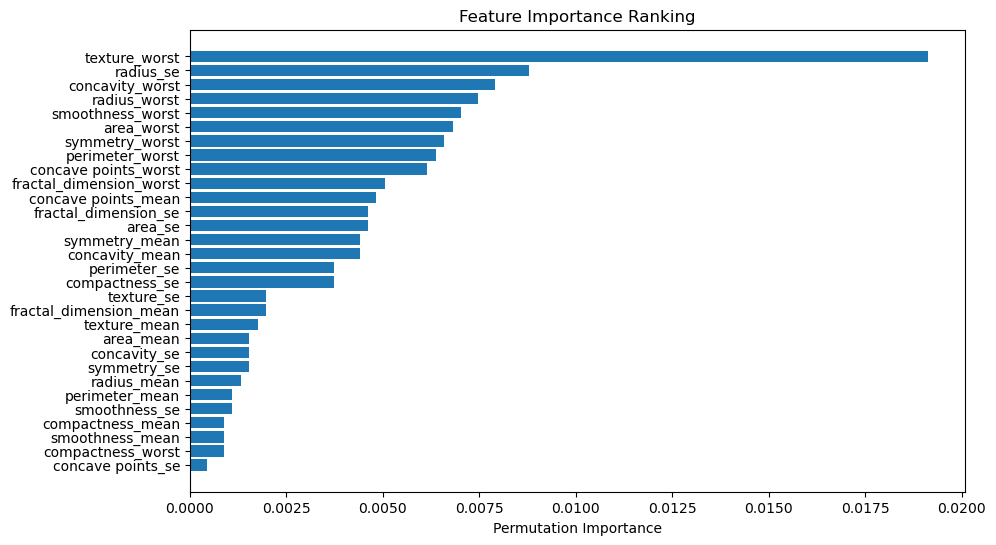

In [42]:
from sklearn.inspection import permutation_importance
# Calculate permutation importances
result = permutation_importance(svc, X_train, y_train, n_repeats=10, random_state=42)

# Sort feature importances
sorted_idx = result.importances_mean.argsort()

# Assuming dataset is your data including the feature names in columns
feature_names = dataset.columns[:-1]

plt.figure(figsize=(10, 6))
# Plot feature importances
plt.barh(range(X_train.shape[1]), result.importances_mean[sorted_idx], align='center')
plt.yticks(range(X_train.shape[1]), feature_names[sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance Ranking')
plt.show()

### Hence the prediction of the SVM classifier is greatly influence by the texture_worst feature